In [2]:
import pandas as pd

blood_transfusion = pd.read_csv("blood_transfusion.csv")
target_name = "Class"
data = blood_transfusion.drop(columns=target_name)
target = blood_transfusion[target_name]

In [3]:
target.unique()

array(['donated', 'not donated'], dtype=object)

In [4]:
target.value_counts()

Class
not donated    570
donated        178
Name: count, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = train_test_split(
    data, target, random_state = 42, test_size = 0.25
)

In [10]:
from sklearn.dummy import DummyClassifier

model = DummyClassifier(strategy = 'most_frequent')

In [11]:
model.fit(data_train, target_train)

DummyClassifier(strategy='most_frequent')

In [12]:
from sklearn.model_selection import cross_validate

cv_results = cross_validate(model, data, target, cv = 10)

In [13]:
print(
    "The mean cross-validated accuracy is: "
    f"{cv_results['test_score'].mean():.2f}"
)

The mean cross-validated accuracy is: 0.76


In [14]:
cv_results = cross_validate(model, data, target, cv = 10, scoring = "balanced_accuracy")
print(
    "The mean cross-validated accuracy is: "
    f"{cv_results['test_score'].mean():.2f}"
)

The mean cross-validated accuracy is: 0.50


In [15]:
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

model = make_pipeline(StandardScaler(), KNeighborsClassifier())

In [16]:
model.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('kneighborsclassifier', KNeighborsClassifier())],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'kneighborsclassifier': KNeighborsClassifier(),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'kneighborsclassifier__algorithm': 'auto',
 'kneighborsclassifier__leaf_size': 30,
 'kneighborsclassifier__metric': 'minkowski',
 'kneighborsclassifier__metric_params': None,
 'kneighborsclassifier__n_jobs': None,
 'kneighborsclassifier__n_neighbors': 5,
 'kneighborsclassifier__p': 2,
 'kneighborsclassifier__weights': 'uniform'}

In [17]:
model = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors = 1))

In [18]:
cv_results = cross_validate(model, data, target, cv = 10, scoring = "balanced_accuracy", return_train_score = True)
print(
    "The mean cross-validated train accuracy is: "
    f"{cv_results['train_score'].mean():.2f}"
)
print(
    "The mean cross-validated test accuracy is: "
    f"{cv_results['test_score'].mean():.2f}"
)

The mean cross-validated train accuracy is: 0.89
The mean cross-validated test accuracy is: 0.47


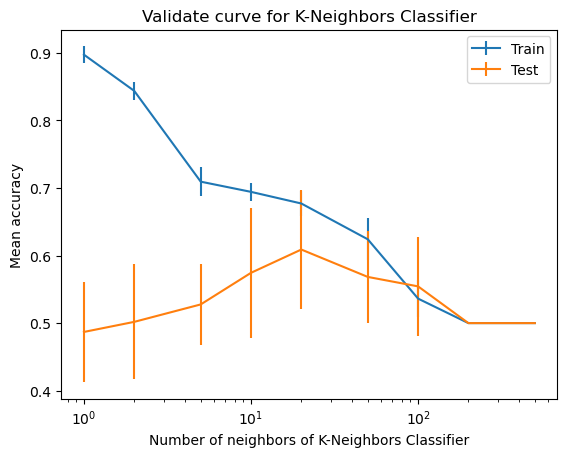

In [20]:
import numpy as np
param_range = np.array([1, 2, 5, 10, 20, 50, 100, 200, 500])

from sklearn.model_selection import ValidationCurveDisplay

disp = ValidationCurveDisplay.from_estimator(
    model,
    data,
    target,
    param_name = "kneighborsclassifier__n_neighbors",
    param_range = param_range,
    cv = 5,
    scoring = 'balanced_accuracy',
    std_display_style = "errorbar",
    n_jobs = 2,
)
_ = disp.ax_.set(
    xlabel = "Number of neighbors of K-Neighbors Classifier",
    ylabel = "Mean accuracy",
    title = "Validate curve for K-Neighbors Classifier",
)